<a href="https://colab.research.google.com/github/Yash-Kamtekar/frequent-pattern-mining-apriori-and-fpgrowth/blob/main/Apriori_Assignment_and_FP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apriori and FP Growth Assignment
Group Name:- Abraca-data
Group Members


1.   Swathi Anandram
2.   Yash Kamtekar
3.   Aryan Jadon

###APRIORI ALGORITHM
Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

###FP GROWTH ALGORITHM
FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree. This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. The itemsets of these fragmented patterns are analyzed.

###Installing necessary libraries

In [1]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 7.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


###Importing necessary libraries

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

###Kaggle setup to load dataset

In [3]:
!rm -rf ~/.kaggle
!ls

sample_data


In [4]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashkamtekar","key":"892f205c6a7ce201835363775cd0d70f"}'}

In [5]:
!ls

kaggle.json  sample_data


In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle kernels output roshansharma/market-basket-analysis -p /path/to/dest

Kernel log downloaded to /path/to/dest/market-basket-analysis.log 


In [8]:
!kaggle datasets download heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 17.0MB/s]


In [9]:
!ls
!unzip groceries-dataset.zip

groceries-dataset.zip  kaggle.json  sample_data
Archive:  groceries-dataset.zip
  inflating: Groceries_dataset.csv   


###Load the data frame and change it to the necessary format

In [10]:
data_frame = pd.read_csv('Groceries_dataset.csv')
data_frame

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [11]:
data_frame = pd.read_csv('Groceries_dataset.csv')
data_frame.product_name = ["".join(i.split(",")) for i in data_frame.itemDescription]
member_labels = data_frame.Member_number.unique()
transactions = [data_frame[data_frame.Member_number == i]["itemDescription"].tolist() for i in member_labels]
trans_encoder = TransactionEncoder().fit(transactions)
transactions = trans_encoder.transform(transactions)
transactions = pd.DataFrame(transactions,columns=trans_encoder.columns_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


###Calculate the frequent itemset using both Apriori and FPGrowth, also calculate the Association rules using both Apriori and FPGrowth

In [12]:
freq_itemset_using_apriori = apriori(transactions, min_support = 0.0045, use_colnames = True)
freq_itemset_using_fpgrowth = fpgrowth(transactions, min_support = 0.0045, use_colnames=True)
association_rules_using_apriori = association_rules(freq_itemset_using_apriori, metric = "confidence")
association_rules_using_fpgrowth = association_rules(freq_itemset_using_fpgrowth, metric = "confidence")

###Association Rules generation using Apriori Method

In [13]:
print("Association Rules using Apriori Method:- \n")
for item in association_rules_using_apriori.iterrows():
  print(f"Rule {item[0] + 1}: {tuple(item[1].antecedents)} -> {tuple(item[1].consequents)}")

Association Rules using Apriori Method:- 

Rule 1: ('meat spreads',) -> ('whole milk',)
Rule 2: ('canned vegetables', 'bottled water') -> ('whole milk',)
Rule 3: ('chewing gum', 'white bread') -> ('whole milk',)
Rule 4: ('ham', 'curd') -> ('whole milk',)
Rule 5: ('shopping bags', 'frozen fish') -> ('whole milk',)
Rule 6: ('mayonnaise', 'other vegetables') -> ('whole milk',)
Rule 7: ('soft cheese', 'sausage') -> ('whole milk',)
Rule 8: ('citrus fruit', 'beef', 'bottled beer') -> ('whole milk',)
Rule 9: ('beef', 'root vegetables', 'bottled beer') -> ('whole milk',)
Rule 10: ('bottled water', 'berries', 'pip fruit') -> ('other vegetables',)
Rule 11: ('yogurt', 'berries', 'pip fruit') -> ('whole milk',)
Rule 12: ('yogurt', 'shopping bags', 'berries') -> ('whole milk',)
Rule 13: ('brown bread', 'shopping bags', 'bottled beer') -> ('whole milk',)
Rule 14: ('cat food', 'other vegetables', 'bottled beer') -> ('whole milk',)
Rule 15: ('margarine', 'bottled water', 'newspapers') -> ('whole milk'

###Association Rules generation using FPGrowth Method

In [14]:
print("Association Rules using fpgrowth Method:- \n")
for item in association_rules_using_fpgrowth.iterrows():
  print(f"Rule {item[0] + 1}: {tuple(item[1].antecedents)} -> {tuple(item[1].consequents)}")

Association Rules using fpgrowth Method:- 

Rule 1: ('sugar', 'root vegetables', 'rolls/buns') -> ('whole milk',)
Rule 2: ('domestic eggs', 'other vegetables', 'meat') -> ('whole milk',)
Rule 3: ('brown bread', 'other vegetables', 'meat') -> ('whole milk',)
Rule 4: ('yogurt', 'citrus fruit', 'candy') -> ('whole milk',)
Rule 5: ('yogurt', 'other vegetables', 'whipped/sour cream', 'butter') -> ('whole milk',)
Rule 6: ('coffee', 'other vegetables', 'rolls/buns', 'sausage') -> ('whole milk',)
Rule 7: ('pastry', 'yogurt', 'chocolate') -> ('whole milk',)
Rule 8: ('yogurt', 'other vegetables', 'pip fruit', 'bottled water') -> ('whole milk',)
Rule 9: ('yogurt', 'rolls/buns', 'pip fruit', 'bottled water') -> ('whole milk',)
Rule 10: ('yogurt', 'soda', 'pip fruit', 'bottled water') -> ('whole milk',)
Rule 11: ('yogurt', 'bottled water', 'other vegetables', 'frankfurter') -> ('whole milk',)
Rule 12: ('yogurt', 'soda', 'pork', 'pip fruit') -> ('whole milk',)
Rule 13: ('soda', 'shopping bags', 'por

###Visualization of support and confidence for Apriori

In [15]:
 support_for_apriori = association_rules_using_apriori['support'].values
 confidence_for_apriori = association_rules_using_apriori['confidence'].values

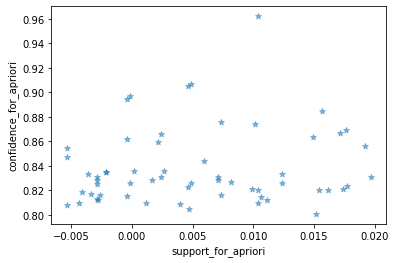

In [16]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support_for_apriori)):
   support_for_apriori[i] = support_for_apriori[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence_for_apriori[i] = confidence_for_apriori[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support_for_apriori, confidence_for_apriori,   alpha=0.5, marker="*")
plt.xlabel('support_for_apriori')
plt.ylabel('confidence_for_apriori') 
plt.show()

###Visualization of support and confidence for FP Growth

In [17]:
 support_for_fp = association_rules_using_fpgrowth['support'].values
 confidence_for_fp = association_rules_using_fpgrowth['confidence'].values

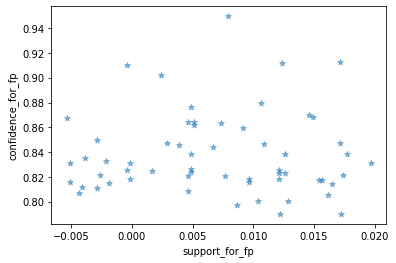

In [18]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support_for_fp)):
   support_for_fp[i] = support_for_fp[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence_for_fp[i] = confidence_for_fp[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support_for_fp, confidence_for_fp,   alpha=0.5, marker="*")
plt.xlabel('support_for_fp')
plt.ylabel('confidence_for_fp') 
plt.show()